In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [8]:
import nltk
from nltk.corpus import conll2000
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.chunk import ne_chunk
from nltk import pos_tag
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Steps:
 Setup + NLTK

 VADER Model

 RoBERTa Model

 Compare Results

In [9]:
df = pd.read_csv(r"C:\Users\manik\Desktop\DS_projects\sentimental_Analysis\Amazon_reviews.csv")
df.head()
df1 = df.head(500)
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df1.shape

(500, 10)

<Axes: title={'center': 'review out of 5'}, xlabel='Score'>

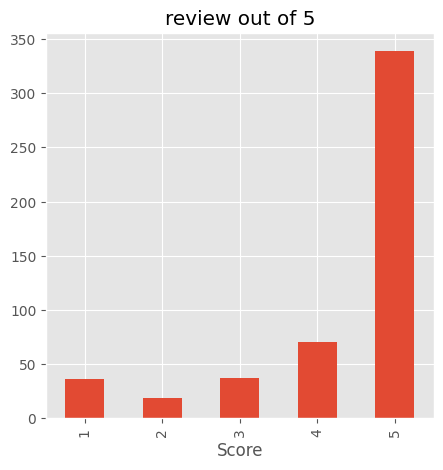

In [11]:
df1['Score'].value_counts().sort_index().plot(kind='bar',title="review out of 5",figsize=(5,5))

In [12]:
a=df['Text'][50]
a

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [13]:
#RoBERTa Model
tokens = nltk.word_tokenize(a)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [15]:

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER sentiment analysis(it takes all values in statement and it says how positive ot negative the words (here the words are independent ))

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm_notebook
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores('this is the worst scores ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [20]:
sia.polarity_scores(a)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm.tqdm(df1.iterrows(), total=len(df1)):
    text = row["Text"]  # Assuming "Test" is the column containing the text
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


100%|██████████| 500/500 [00:00<00:00, 1743.71it/s]


In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df1,how ='left')

In [23]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: xlabel='Score', ylabel='compound'>

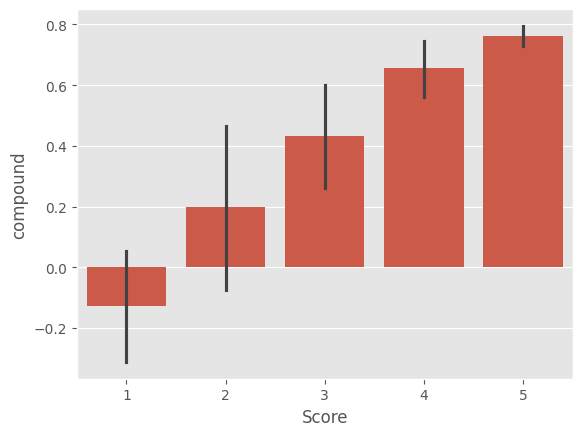

In [24]:
sns.barplot(data=vaders, x = 'Score', y = 'compound')

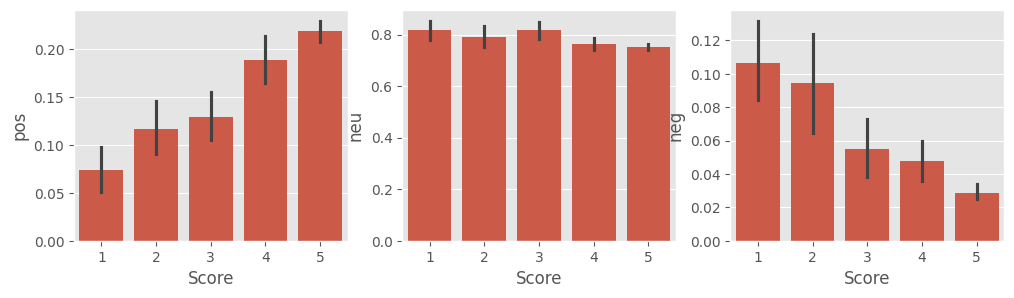

In [25]:
fig, axs = plt.subplots(1,3,figsize = (12,3))
sns.barplot(data =vaders , x= 'Score', y='pos', ax = axs[0])
sns.barplot(data =vaders , x= 'Score', y='neu', ax = axs[1])
sns.barplot(data =vaders , x= 'Score', y='neg', ax = axs[2])
plt.show()

#Roberta Pretrained Model

In [26]:

import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [30]:
#vader result on row a
print(a)
sia.polarity_scores(a)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [39]:
#Roberta Model
def polarity_scores_roberta(example):

    encoded_text = tokenizer(a, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rob_neg' : scores[0],
        'rob_neu' : scores[1],
        'rob_pos' : scores[2],

    }
    return scores_dict

In [51]:
res1 = {}
for i, row in tqdm.tqdm(df1.iterrows(), total=len(df1)):
    text = row["Text"]  # Assuming "Test" is the column containing the text
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"]=value

    robert_result = polarity_scores_roberta(text)
    both = {**vader_result, **robert_result}
    res[myid] = both


100%|██████████| 500/500 [01:07<00:00,  7.41it/s]


In [52]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns ={'index':'Id'})
result_df = result_df.merge(df1, how='left')

In [53]:
result_df.head()

,Id,neg,neu,pos,compound,rob_neg,rob_neu,rob_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.976355,0.020687,0.002957,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.976355,0.020687,0.002957,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.976355,0.020687,0.002957,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.976355,0.020687,0.002957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.976355,0.020687,0.002957,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


compare scores between models

In [54]:
result_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'rob_neg', 'rob_neu', 'rob_pos',
       'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

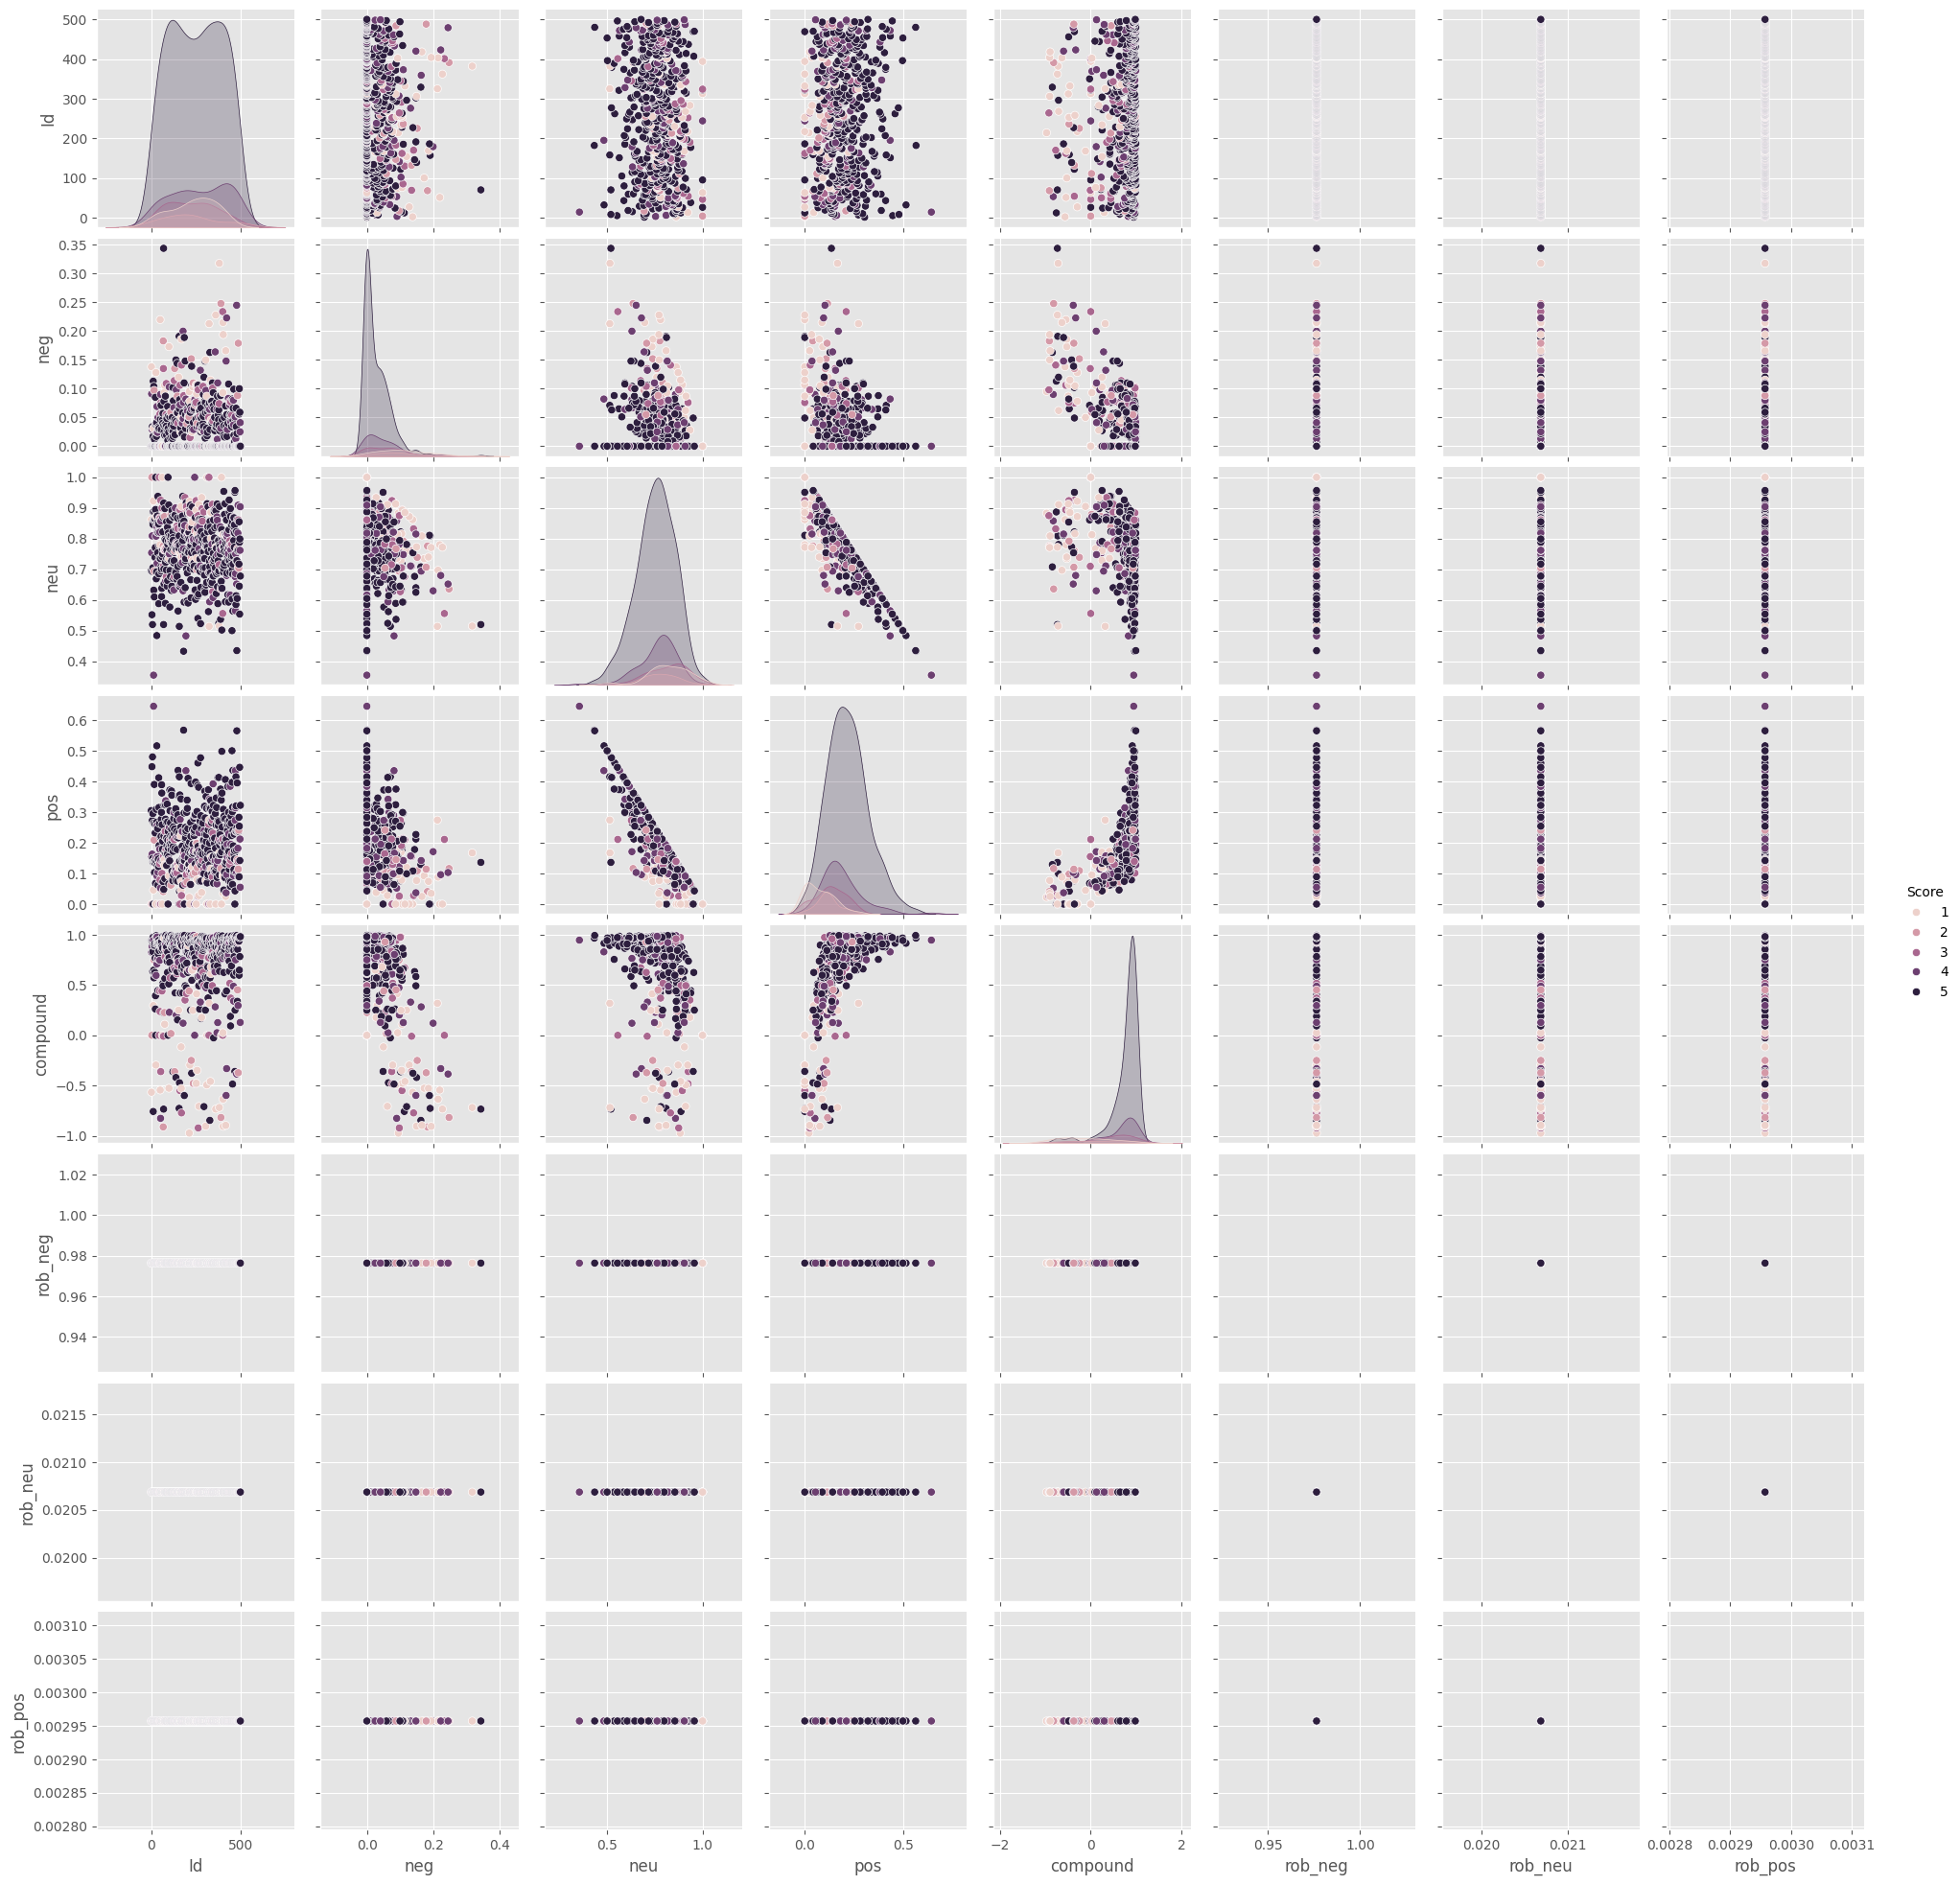

In [58]:
sns.pairplot(data = result_df, vars = ['Id', 'neg', 'neu', 'pos', 'compound', 'rob_neg', 'rob_neu', 'rob_pos'], hue ='Score')
plt.show()

In [63]:
result_df.query('Score ==1').sort_values('rob_pos', ascending=False)['Text'].values[0]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [64]:
result_df.query('Score ==1').sort_values('pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [66]:
result_df.query('Score ==5').sort_values('rob_neg', ascending=False)['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [67]:
result_df.query('Score ==5').sort_values('neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'